# Informe sobre FIUFIP: Que No Se Escape Nadie

Primero, abrimos el dataset con pandas, para poder tener un primer pantallazo del dataset.

In [1]:
import pandas as pd

In [2]:
GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)

FIUFIP_2021_1_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'
df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=FIUFIP_2021_1_GID))

In [3]:
df.head()

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado


A partir de esta primera observación, podemos plantearnos algunas preguntas entender cómo determinar si una persona es de bajos o altos ingresos: ¿cómo se relacionan los parámetros del dataset con los ingresos de las personas? ¿Hay una correlación entre los ingresos y los años estudiados? ¿Entre los ingresos y la ganancia perdida?, ¿con las horas de trabajo registradas?, ¿con la edad o rol familiar?, ¿con algún otro parámetro?

In [4]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

## ¿Hay valores inválidos en el dataset?

In [5]:
print(df.astype('str').eq('-').any(0).value_counts())
print(df.astype('str').eq('').any(0).value_counts())
(df[['edad', 'horas_trabajo_registradas']] < 0).any()

False    13
dtype: int64
False    13
dtype: int64


edad                         False
horas_trabajo_registradas    False
dtype: bool

- Se pueden descartar los casos básicos de valores inválidos en este dataset.

## ¿Hay missings?

In [6]:
print((df.isnull().mean() * 100).to_frame('Porcentaje de nulos'))

                                            Porcentaje de nulos
anios_estudiados                                       0.000000
barrio                                                 1.790486
categoria_de_trabajo                                   5.638647
edad                                                   0.000000
educacion_alcanzada                                    0.000000
estado_marital                                         0.000000
ganancia_perdida_declarada_bolsa_argentina             0.000000
genero                                                 0.000000
horas_trabajo_registradas                              0.000000
religion                                               0.000000
rol_familiar_registrado                                0.000000
tiene_alto_valor_adquisitivo                           0.000000
trabajo                                                5.660146


- Se idenfican los features con missings y se observa que poseen porcentajes bajos.

## ¿Como tratar los missings presentes?

- Primero, se analizan las categorías presentes para entender si existe una categoría asociada a respuestas no informadas.

In [7]:
print(*(df['barrio'].dropna().unique()), sep= "\n") 

Palermo
Balvanera
Caballito
Almagro
Belgrano
Boedo
La Boca
Versalles
Puerto Madero
Recoleta
Villa Urquiza
Nueva Pompeya
San Isidro
Chacarita
Flores
Liniers
Villa Devoto
San Telmo
Parque Chas
Villa Real
Monte Castro
Mataderos
Monserrat
Coghland
Agronomia
Villa Luro
Constitucion
Barracas
Colegiales
Santa Rita
Parque Chacabuco
Villa General Mitre
Villa Pueyrredon
Villa Soldati
Parque Avellaneda
nuñez
Floresta
Retiro
La Paternal
Velez Sarsfield
Cilla Riachuelo


In [8]:
print(*(df['categoria_de_trabajo'].dropna().unique()), sep = "\n")

empleado_provincial
monotibutista
relacion_de_dependencia
empleadao_estatal
empleado_municipal
responsable_inscripto
trabajo_voluntariado
sin_trabajo


In [9]:
print(*(df['trabajo'].dropna().unique()), sep="\n")

entretenimiento
directivo_gerente
limpiador
profesional_especializado
otros
ventas
reparador
transporte
sector_primario
inspector
soporte_tecnico
seguridad
ejercito
servicio_domestico


- Clasificación de missings por feature: 
    - barrio: Completamente aleatorios
    - categoria_de_trabajo: Completamente aleatorios
    - trabajo: Aleatorios
- Tratamiento de missings: para barrio y categoria_de_trabajo se asignarán nuevas categorías, en ambos casos llamadas "sin_informar". Para trabajo se hará lo mismo, pero en los casos en que categoria_de_trabajo sea sin_trabajo se asignará una nueva categoria llamada "sin_trabajo". 

In [10]:
df['barrio'] = df['barrio'].replace(np.nan, 'sin_informar')
df['categoria_de_trabajo'] = df['categoria_de_trabajo'].replace(np.nan, 'sin_informar')
df['trabajo'] = df['trabajo'].replace(np.nan, 'sin_informar')
df.loc[df['categoria_de_trabajo'] == 'sin_trabajo', ['trabajo']] = 'sin_trabajo'

In [11]:
print((df.isnull().mean() * 100).to_frame('Porcentaje de nulos'))

                                            Porcentaje de nulos
anios_estudiados                                            0.0
barrio                                                      0.0
categoria_de_trabajo                                        0.0
edad                                                        0.0
educacion_alcanzada                                         0.0
estado_marital                                              0.0
ganancia_perdida_declarada_bolsa_argentina                  0.0
genero                                                      0.0
horas_trabajo_registradas                                   0.0
religion                                                    0.0
rol_familiar_registrado                                     0.0
tiene_alto_valor_adquisitivo                                0.0
trabajo                                                     0.0


- Se observa que todos los missings expuestos han sido neutralizados

## ¿Hay barrios habitados mayoritariamente por personas con alto valor adquisitivo?

<Figure size 900x600 with 0 Axes>

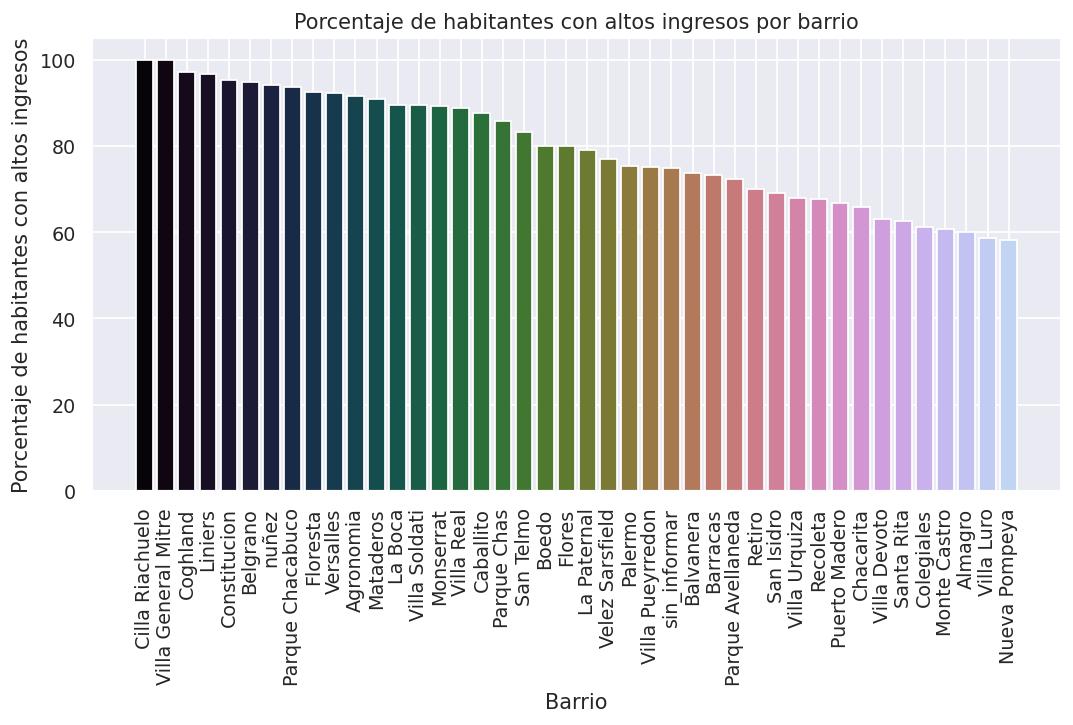

In [12]:
plt.figure(dpi=150)

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 0]

df_r = (df_filtrado['barrio'].value_counts() / df_total['barrio'].value_counts()).sort_values(ascending=False)

plt.figure(figsize=(10, 4.8),dpi=(125))

plt.bar(df_r.index, df_r.values*100, color=sns.color_palette('cubehelix', 50)) 
plt.ylabel("Porcentaje de habitantes con altos ingresos")
plt.xlabel("Barrio")
plt.title('Porcentaje de habitantes con altos ingresos por barrio')
plt.xticks(rotation=90)
plt.show()

- Se observa que en existe un conjunto de barrios en los que menos del %15 de su población es de altos ingresos. 

### ¿Qué cantidad de encuestados corresponde a cada barrio?

<Figure size 900x600 with 0 Axes>

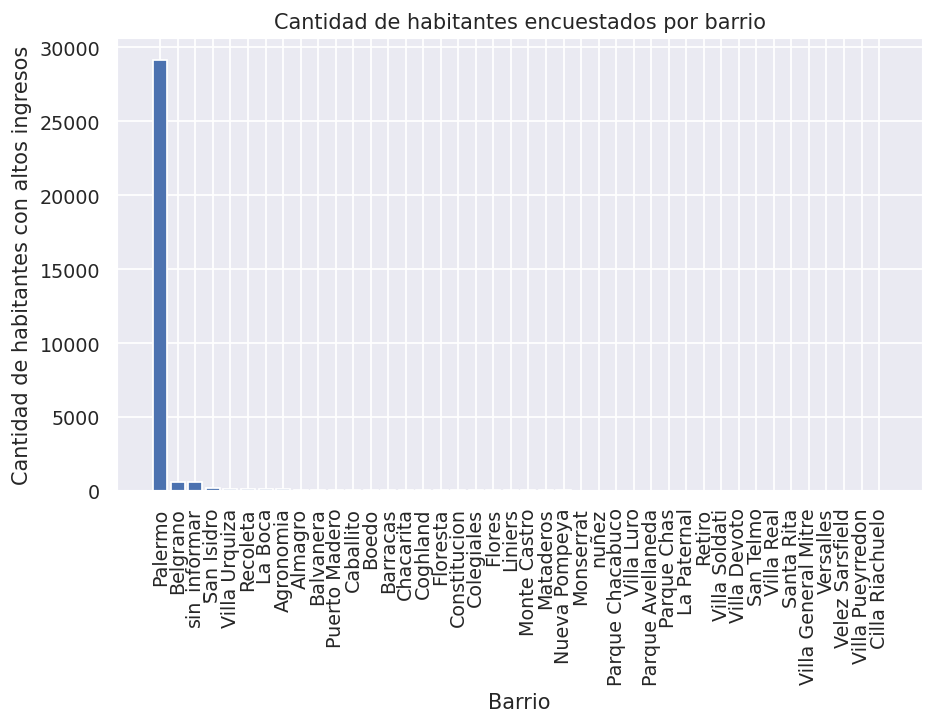

In [13]:
plt.figure(dpi=150)

df_total = df
df_r = df['barrio'].value_counts()

plt.figure(figsize=(6.4*1.3, 4.8), dpi=125)

plt.bar(df_r.index, df_r.values)
plt.ylabel("Cantidad de habitantes con altos ingresos")
plt.xlabel("Barrio")
plt.title('Cantidad de habitantes encuestados por barrio')
plt.xticks(rotation=90)
plt.show() 

- Se observa que la cantidad de personas encuestadas son mayormente de Palermo, al cual corresponde un poco mas del 70% de personas con altos ingresos. En el resto de barrios, hay muy pocos encuestados en relación al total y los resultados no pueden generalizarse.

- El feature barrio no se considerará útil para clasificar a los encuestados.

## ¿Hay categorías de trabajo correspondientes mayoritariamente a personas con bajo valor adquisitivo?

<Figure size 900x600 with 0 Axes>

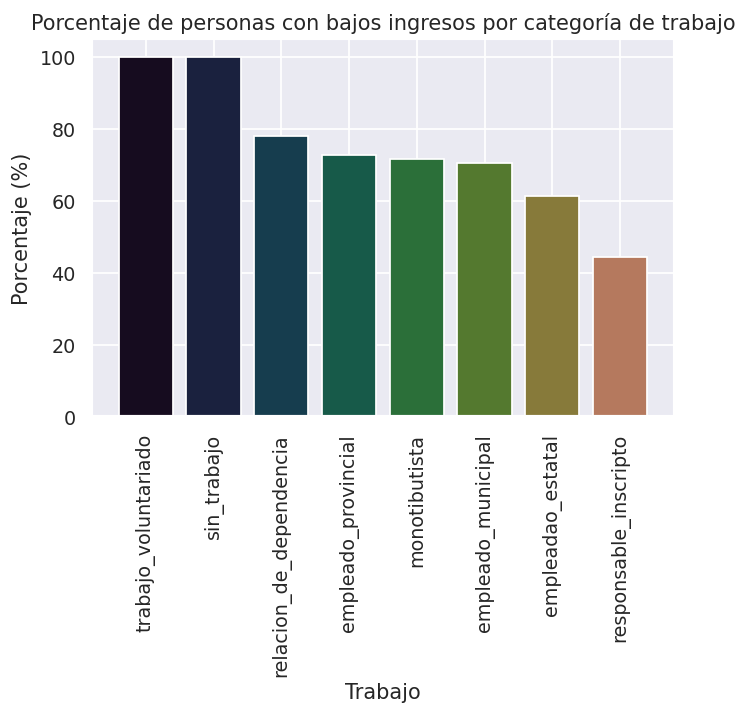

In [5]:
plt.figure(dpi=150)

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 0]

df_r = (df_filtrado['categoria_de_trabajo'].astype('str').value_counts() / df_total['categoria_de_trabajo'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, color=sns.color_palette('cubehelix', 14))
plt.ylabel("Porcentaje (%)")
plt.xlabel("Trabajo")
plt.title("Porcentaje de personas con bajos ingresos por categoría de trabajo")
plt.xticks(rotation=90)
plt.show()

### ¿Qué cantidad de encuestados corresponde a cada trabajo?

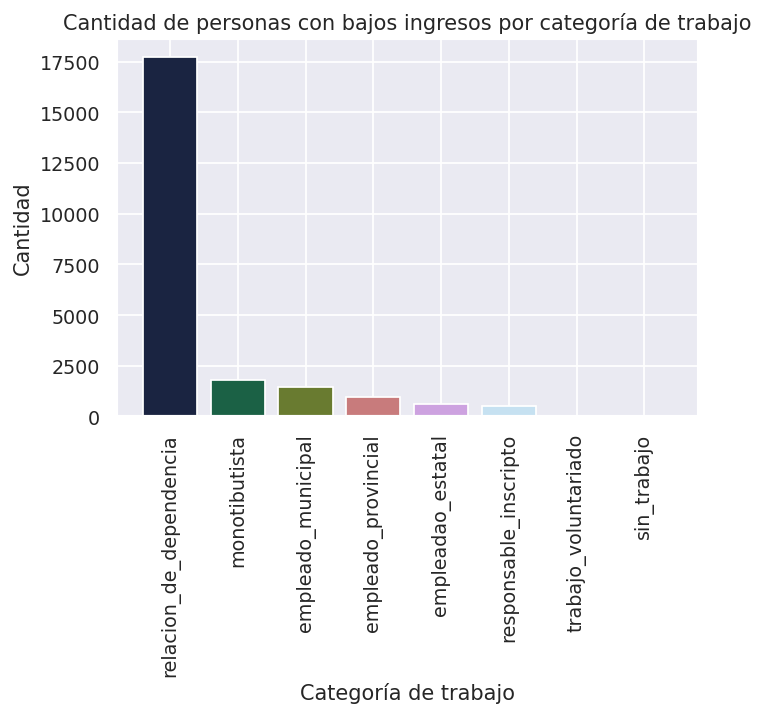

In [6]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 0]

df_r = df_filtrado['categoria_de_trabajo'].value_counts()

plt.figure(dpi=125)

plt.bar(df_r.index, df_r.values, color=sns.color_palette('cubehelix', 6))
plt.ylabel("Cantidad")
plt.xlabel("Categoría de trabajo")
plt.title("Cantidad de personas con bajos ingresos por categoría de trabajo")
plt.xticks(rotation=90)
plt.show()

- Observando ambos gráficos, se observa que la categoría dominante es relacion_de_dependencia, en la cual el porcentaje de altos ingresos es un poco mayor al 70%. También se puede ver que en las categorías de sin_trabajo y trabajo_voluntario, sin bien no tienen muchos encuestados, el 100% de los integrantes es de bajos ingresos.

## ¿Cómo influye la cantidad de años estudiados?

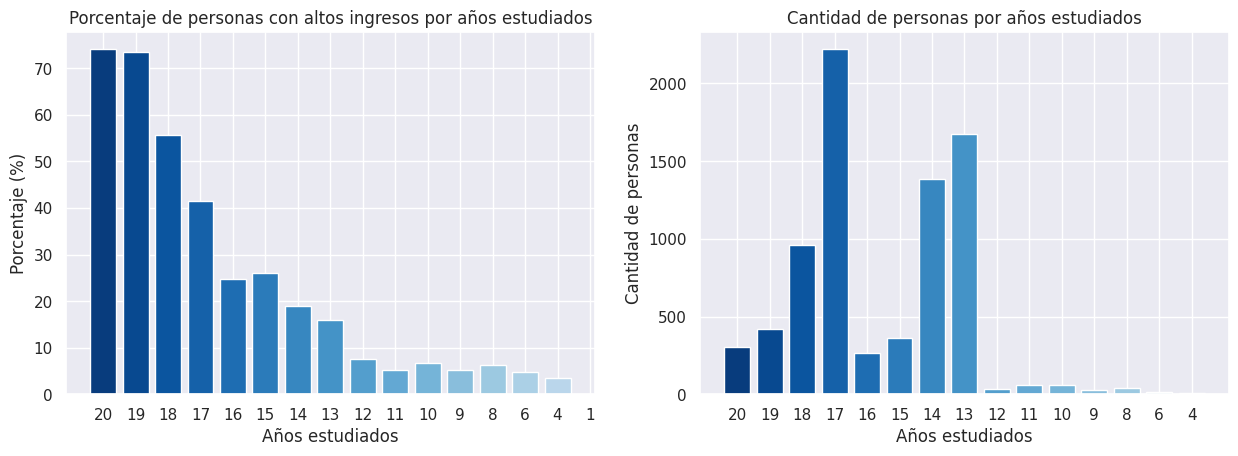

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, dpi=100, figsize=(15, 4.8))

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['anios_estudiados'].value_counts() / df_total['anios_estudiados'].value_counts()).sort_index(ascending = False)
df_cant = (df_filtrado['anios_estudiados'].value_counts().sort_index(ascending = False))

axes[0].bar(df_r.index.map(str), df_r.values*100, color =sns.color_palette('Blues_r', 20))
axes[0].set_ylabel("Porcentaje (%)")
axes[0].set_xlabel("Años estudiados")
axes[0].set_title("Porcentaje de personas con altos ingresos por años estudiados")

axes[1].bar(df_cant.index.map(str), df_cant.values, color=sns.color_palette('Blues_r', 20))
axes[1].set_ylabel("Cantidad de personas")
axes[1].set_xlabel("Años estudiados")
axes[1].set_title("Cantidad de personas por años estudiados")
plt.show()


Se puede ver que hay una alta correlación entre los altos ingresos y la cantidad de años de estudios. Se observa que la cantidad de años dominante es 17, sin embargo se considerará que la dispersión es suficiente para usar este feature en el ajuste del modelo.

## ¿Cómo influye el grado de educación alcanzada?

Primero, usamos Ordinal Encoder para pasar la variable categórica a numérica y poder explicitar el orden.

In [18]:
from sklearn.preprocessing import OrdinalEncoder

categorias = [
 'preescolar',
 '1-4_grado',
 '5-6_grado',
 '7-8_grado',
 '9_grado',
 '1_anio',
 '2_anio',
 '3_anio',
 '4_anio',
 '5_anio',
 'universidad_1_anio',
 'universidad_2_anio',
 'universidad_3_anio',
 'universidad_4_anio',
 'universiada_5_anio',
 'universiada_6_anio'
]
oe = OrdinalEncoder(categories= [categorias])
df[["educacion_alcanzada_encoded"]] = oe.fit_transform(df[["educacion_alcanzada"]])

df[["educacion_alcanzada", "educacion_alcanzada_encoded"]].drop_duplicates().sort_values(by="educacion_alcanzada_encoded")

,educacion_alcanzada,educacion_alcanzada_encoded
224,preescolar,0.0
160,1-4_grado,1.0
56,5-6_grado,2.0
15,7-8_grado,3.0
6,9_grado,4.0
77,1_anio,5.0
3,2_anio,6.0
415,3_anio,7.0
2,4_anio,8.0
10,5_anio,9.0


Luego, graficamos:

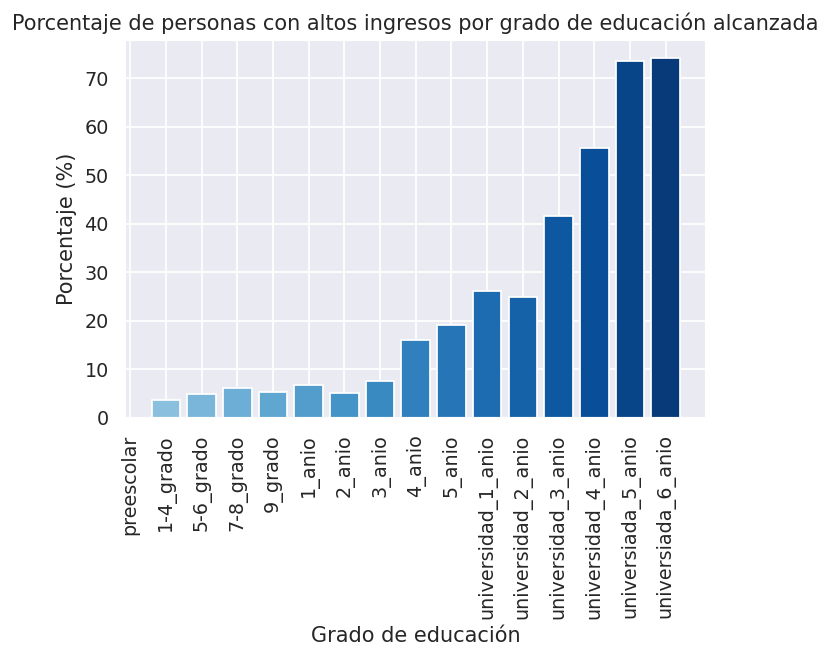

In [18]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['educacion_alcanzada_encoded'].value_counts() / df_total['educacion_alcanzada_encoded'].value_counts()).sort_values()

df_r = df_r.sort_index(ascending=False)
plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100,color =sns.color_palette('Blues_r', 25))
plt.ylabel("Porcentaje (%)")
plt.xlabel("Grado de educación")
plt.title("Porcentaje de personas con altos ingresos por grado de educación alcanzada")
plt.xticks(list(range(0, len(categorias))), categorias, rotation=90)
plt.show()

- De forma similar a los años estudiados, hay una correlación entre el alto grado de educación alcanzada y los altos ingresos.

### ¿Hay una correlación entre los años estudiados y el grado de educación alcanzado?

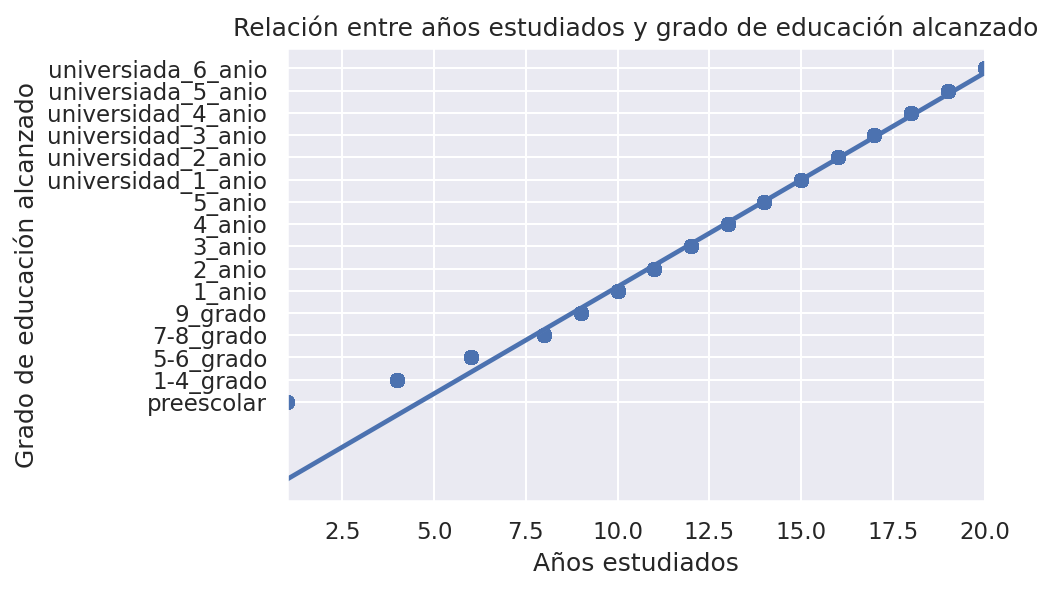

In [91]:
plt.figure(dpi=150)
sns.regplot(
    x='anios_estudiados',
    y='educacion_alcanzada_encoded',
    data=df,
)

plt.xlabel("Años estudiados")
plt.ylabel("Grado de educación alcanzado")
plt.yticks(list(range(0, len(categorias))), categorias)

plt.title('Relación entre años estudiados y grado de educación alcanzado')
plt.show()

- Los features presentan una relación lineal, con tomar solo uno de los dos alcanza para el análisis. El otro feature no agrega información extra.

## ¿Cómo se relaciona la edad con el valor adquisitivo?

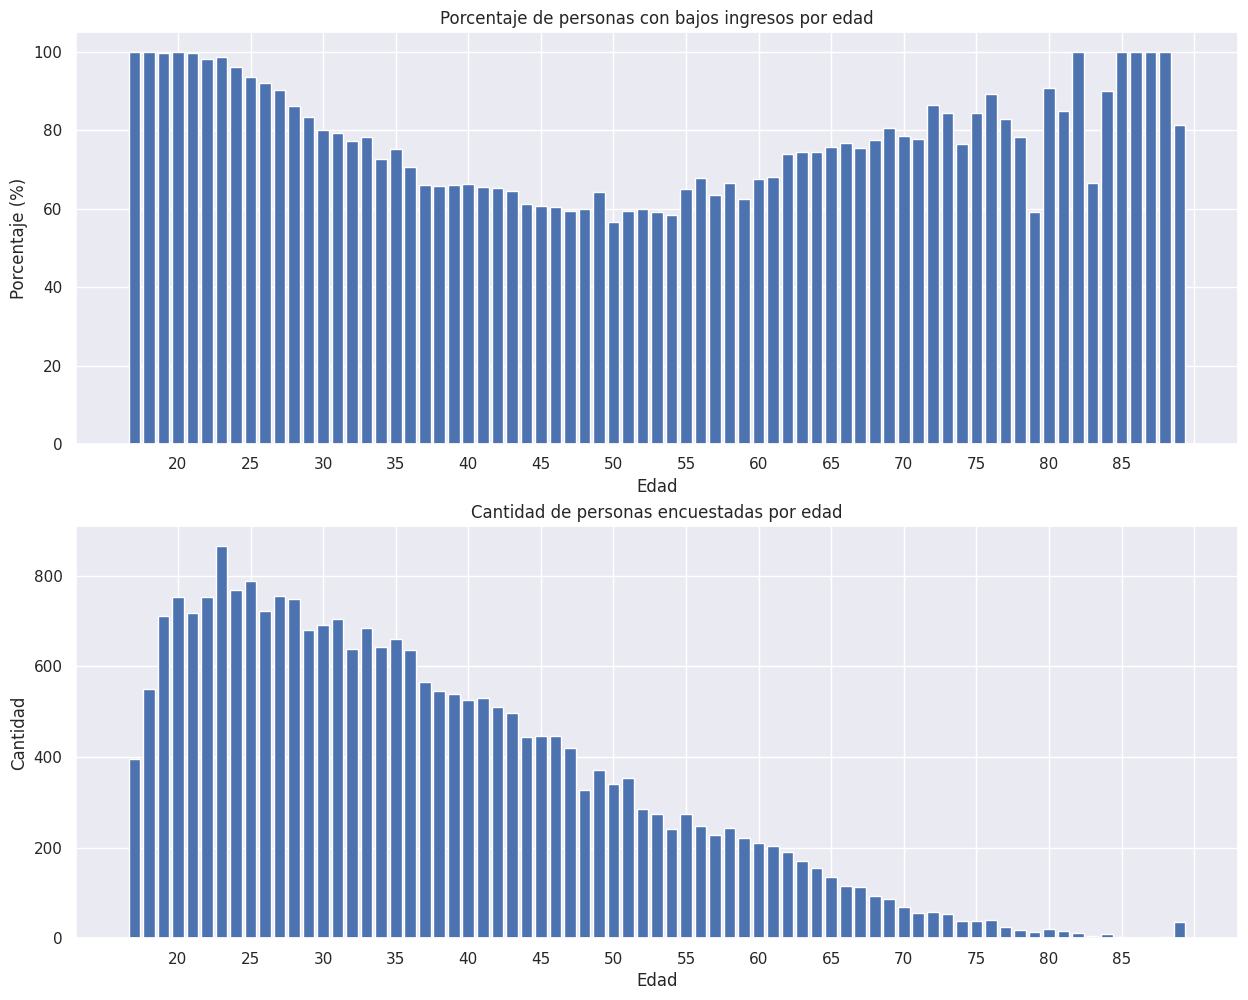

In [84]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 0]

df_r = (df_filtrado['edad'].value_counts() / df_total['edad'].value_counts())
df_cant = df_filtrado['edad'].value_counts().sort_index()

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, dpi=100, figsize=(15, 12))

axes[0].bar(df_r.index.map(str), df_r.values*100)
axes[0].set_ylabel("Porcentaje (%)")
axes[0].set_xlabel("Edad")
axes[0].set_xticks(np.arange(3, len(df_r) +1, 5.0))
axes[0].set_title("Porcentaje de personas con bajos ingresos por edad")

axes[1].bar(df_cant.index.map(str), df_cant.values)
axes[1].set_ylabel("Cantidad")
axes[1].set_xlabel("Edad")
axes[1].set_xticks(np.arange(3, len(df_r) +1, 5.0))
axes[1].set_title("Cantidad de personas encuestadas por edad")

plt.show()

- Se observa que los menores de 28 años son en un alto porcentaje de bajos ingresos, se considerará un factor determinante. 
- También se observa que para edades elevadas se tienen pocas muestras en comparación a las edades bajas, tal que se pierde significancia estadística. Las altas edades no se considerán un factor determinante.

## ¿Cómo influye el área de trabajo con el valor adquisitivo?

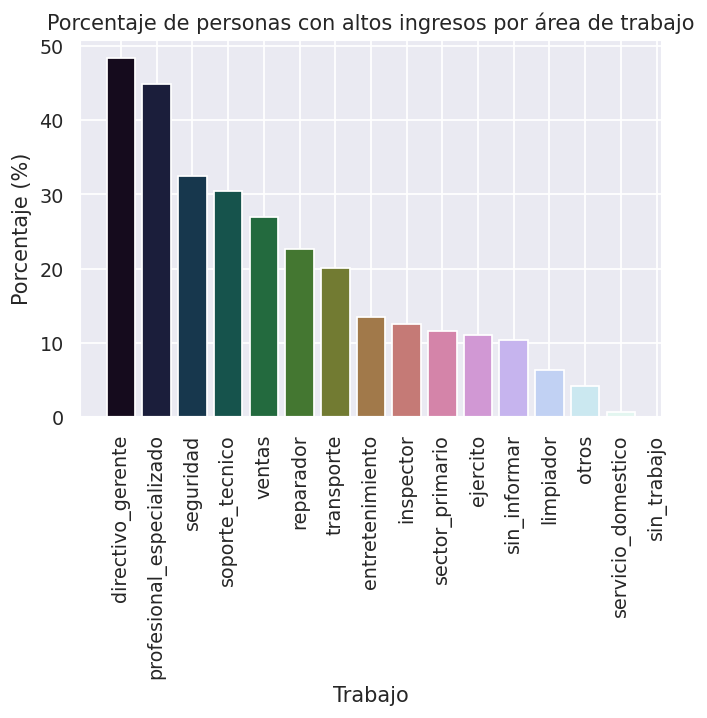

In [32]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['trabajo'].value_counts() / df_total['trabajo'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, color =sns.color_palette('cubehelix', 15))
plt.ylabel("Porcentaje (%)")
plt.xlabel("Trabajo")
plt.title("Porcentaje de personas con altos ingresos por área de trabajo")
plt.xticks(rotation=90)
plt.show()

Vemos que el tipo de trabajo se puede asociar al poder adquisitivo. Los trabajos de limpiador, otros, y servicio doméstico tienen menos del 10% de sus trabajadores con alto poder adquisitivo.

## ¿Cómo se relaciona con las horas de trabajo registradas?

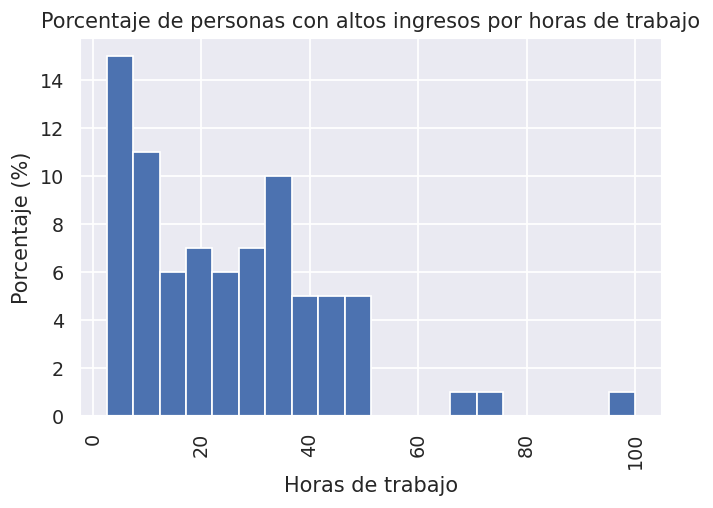

In [22]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = 100*(df_filtrado['horas_trabajo_registradas'].value_counts() / df_total['horas_trabajo_registradas'].value_counts())

plt.figure(dpi=(125))

plt.hist(df_r, bins=20)
plt.ylabel("Porcentaje (%)")
plt.xlabel("Horas de trabajo")
plt.title("Porcentaje de personas con altos ingresos por horas de trabajo")
plt.xticks(rotation=90)
plt.show()

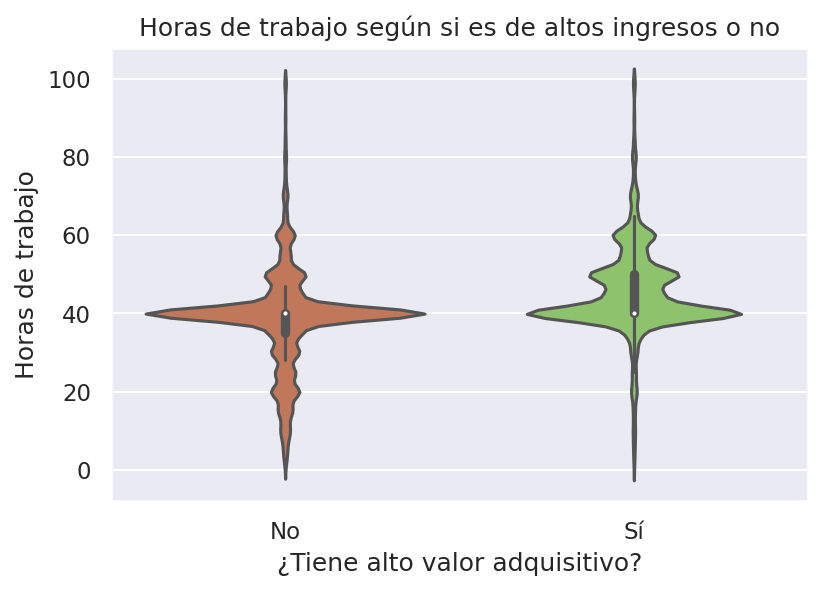

In [23]:
plt.figure(dpi=150)
plt.title("Horas de trabajo según si es de altos ingresos o no")
sns.violinplot(
    data=df,
    y='horas_trabajo_registradas',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Horas de trabajo")
plt.xlabel("¿Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

- Se puede ver que la diferencia de horas de trabajo no varía significativamente entre las personas de altos y bajos ingresos. Sin embargo, aquellos con alto valor adquisivo tienden a trabajar más.

## ¿Cómo se relaciona con el estado marital?

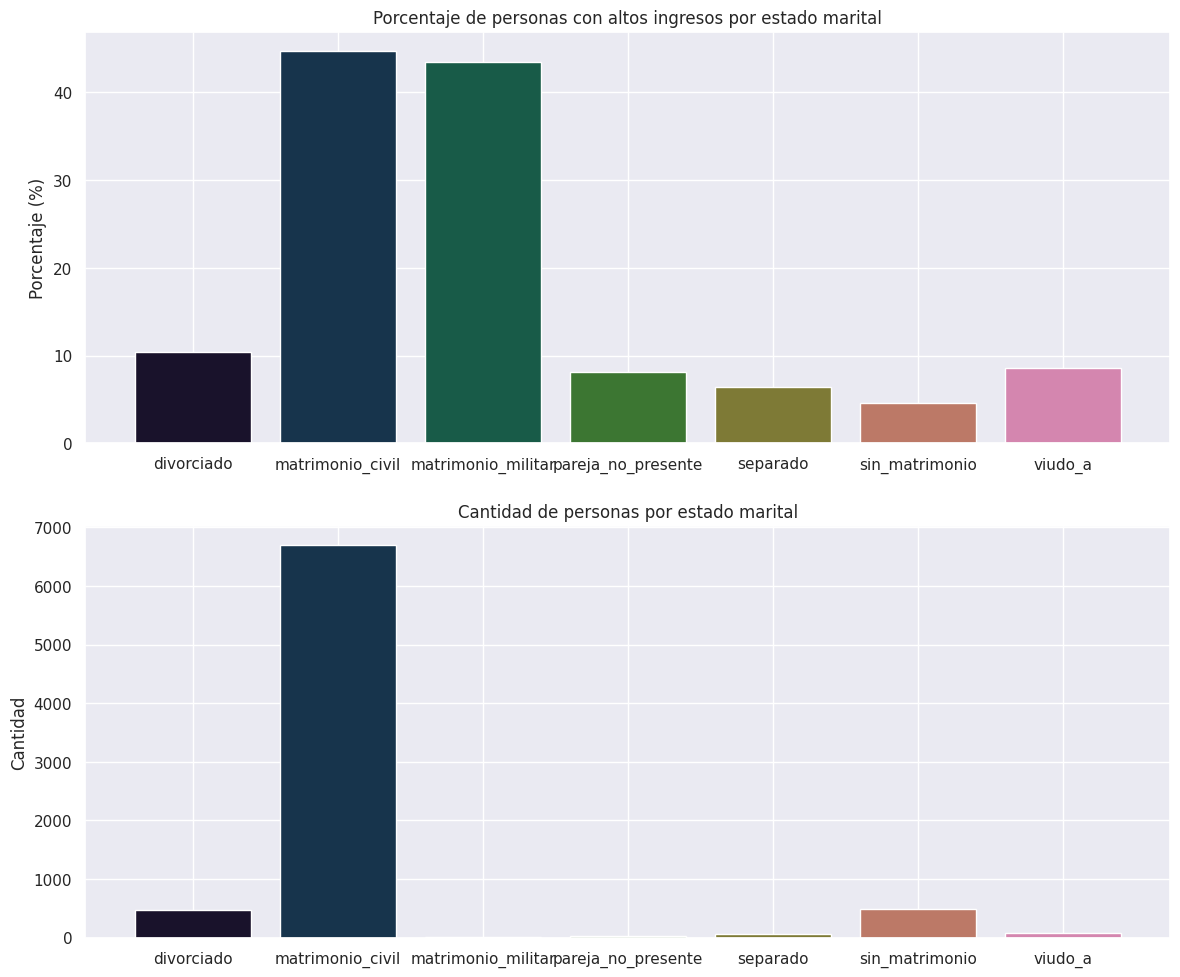

In [85]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1] 

df_r = (df_filtrado['estado_marital'].value_counts() / df_total['estado_marital'].value_counts()).sort_index(ascending=True)
df_cantidad = (df_filtrado['estado_marital'].value_counts()).sort_index(ascending = True)

fig, axes = plt.subplots(nrows=2, ncols=1, dpi=100, figsize=(14, 12))

axes[0].bar(df_r.index, (df_r.values)*100, color =sns.color_palette('cubehelix', 10))
axes[0].set_ylabel("Porcentaje (%)")
# axes[0].set_xlabel("Estado marital")
axes[0].set_title("Porcentaje de personas con altos ingresos por estado marital")

axes[1].bar(df_cantidad.index, df_cantidad.values, color =sns.color_palette('cubehelix', 10))
axes[1].set_ylabel("Cantidad")
# axes[1].set_xlabel("Estado marital")
axes[1].set_title("Cantidad de personas por estado marital")
plt.show()

- Se puede ver que el estado marital tiene correlación con los ingresos. Para las categorías de viudo/a, pareja no presente, separado, o sin matrimonio se ve que menos del 10% de los integrantes es de altos ingresos.

## ¿Cómo se relaciona con la religión?

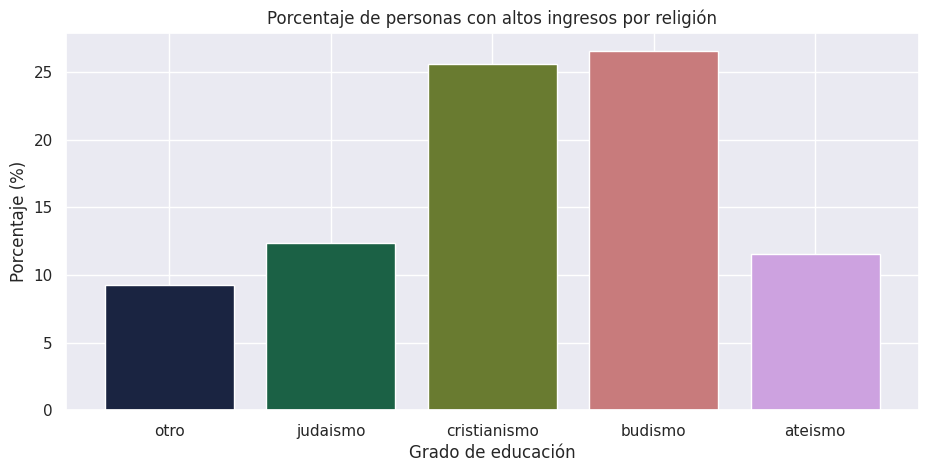

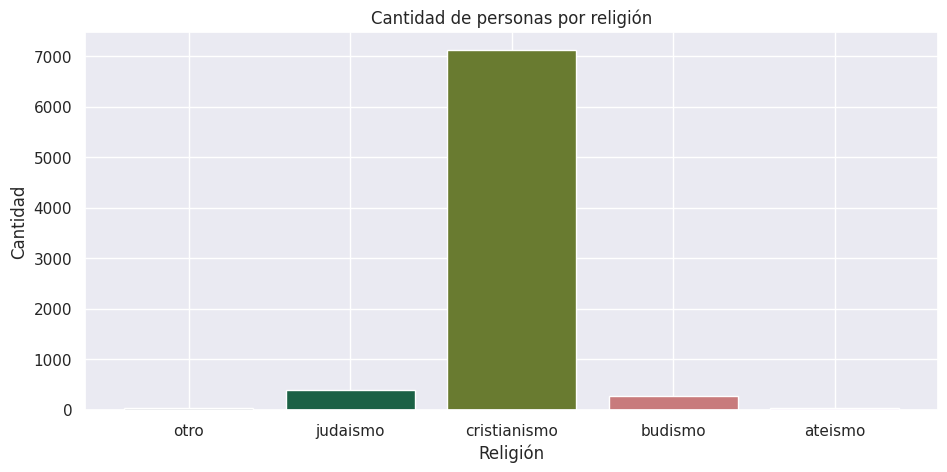

In [90]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['religion'].value_counts()  / df_total['religion'].value_counts()).sort_index(ascending=False)

plt.figure(dpi= 100, figsize=(11,5))

plt.bar(df_r.index, df_r.values*100, color= sns.color_palette('cubehelix', 6))
plt.ylabel("Porcentaje (%)")
plt.xlabel("Grado de educación")
plt.title("Porcentaje de personas con altos ingresos por religión")

plt.show()

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['religion'].value_counts()).sort_index(ascending=False)

plt.figure(dpi=100, figsize=(11,5))

plt.bar(df_r.index, df_r.values, color= sns.color_palette('cubehelix', 6))
plt.ylabel("Cantidad")
plt.xlabel("Religión")
plt.title("Cantidad de personas por religión")
plt.show()

- Podemos ver que la mayoría de encuestados fueron cristianos, y que son, en un porcentaje de alrededor de 25%, de altos ingresos. No se considerará un factor determinante para el calculo de ingresos por no ser suficientemente significativo.

## ¿Cómo se relacionan los ingresos con las ganancias declaradas en la Bolsa?

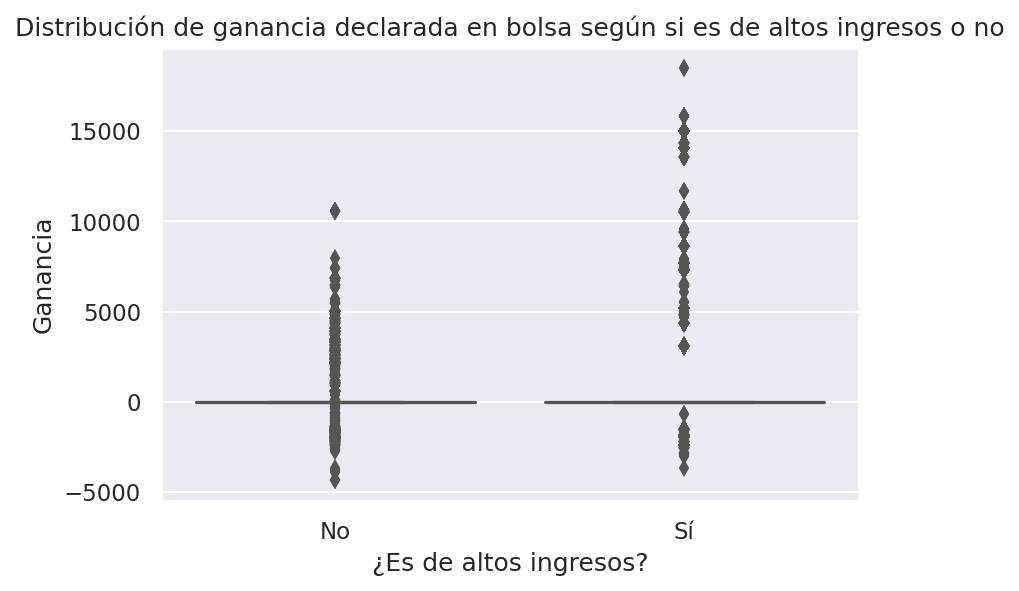

In [26]:
plt.figure(dpi=150)
plt.title("Distribución de ganancia declarada en bolsa según si es de altos ingresos o no")
sns.boxplot(
    data=df[df['ganancia_perdida_declarada_bolsa_argentina'] < 20000],
    y='ganancia_perdida_declarada_bolsa_argentina',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Ganancia")
plt.xlabel("¿Es de altos ingresos?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

- Se puede ver que todos los valores de ganancias en la bolsa están concentrados alrededor del cero tanto para altos como para bajos ingresos. No se considerará un factor determinante.

## ¿Cómo se relacionan los ingresos con el género?

<Figure size 432x288 with 0 Axes>

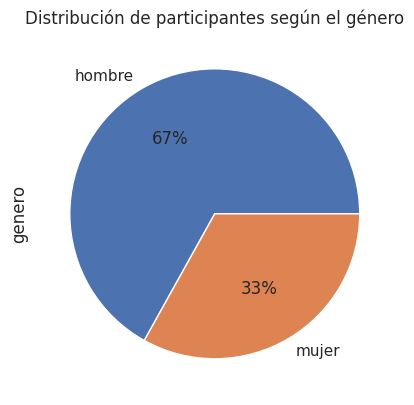

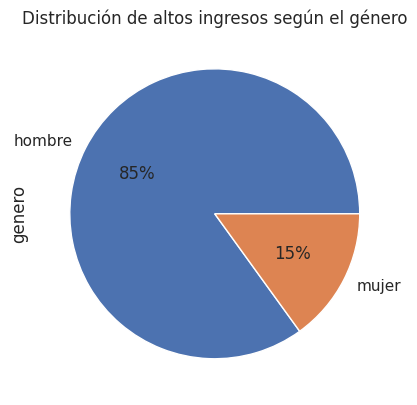

In [27]:
plt.figure()
plt.figure(figsize=(6.4*1.3, 4.8), dpi=100)
plt.title("Distribución de participantes según el género")

df_filtrado = df
df_filtrado['genero'].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)


plt.figure(figsize=(6.4*1.3, 4.8), dpi=100)
plt.title("Distribución de altos ingresos según el género")

df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]
df_filtrado['genero'].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)

plt.show()

- Se puede observar que el porcentaje de mujeres disminuye entre las personas de altos ingresos.

# Predicción

En base al análisis realizado, proponemos un predictor baseline:

In [94]:
def baseline(df):
    df = ((df['anios_estudiados'] > 15)
    ) & ((df['rol_familiar_registrado'] != 'con_hijos')
    ) & ((df['trabajo'] != 'limpiador') & (df['trabajo'] != 'otros') & (df['trabajo'] != 'servicio_domestico')
    ) & ((df['estado_marital'] == 'matrimonio_civil') | (df['estado_marital'] == 'matrimonio_militar')
    ) & ((df['edad']>27) & (df['edad']<73)
    ) & ((df['categoria_de_trabajo'] != 'sin_trabajo') & (df['categoria_de_trabajo'] != 'trabajo_voluntario'))
    return list(df.astype(int))

Usamos el dataset para calcular la accuracy de la predicción:

In [95]:
prediccion = baseline(df)
inicial = list(df['tiene_alto_valor_adquisitivo'])

j = 0
for i in range(0,len(inicial)):
    if (inicial[i] == prediccion[i]):
        j += 1
                
acc = 100*(j / len(inicial))
print(f'ACCURACY: {acc} %')

ACCURACY: 82.22106200669512 %
